In [46]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


ruta = os.getcwd() +"/datos/breast-cancer.csv"

df = pd.read_csv(ruta)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
X = df.drop(columns=["id","diagnosis"]).values
print(X.shape)


(569, 30)


In [48]:
Xmin = X.min(axis=0)
Xmax = X.max(axis=0)
Xnorm = (X - Xmin) / (Xmax - Xmin)


cols = df.drop(columns=['id','diagnosis']).columns


def reduccion_varianza(X,k,cols=None):
    varianza = X.var(axis=0)
    orden = np.argsort(varianza)[::-1]
    if cols is None:
        return X[:,orden[:k]]
    return X[:,orden[:k]], cols[orden[:k]]
k=3
x_reducidas , cols_seleccionadas = reduccion_varianza(Xnorm,k,cols)
print(x_reducidas.shape)
print(cols_seleccionadas)
        

(569, 3)
Index(['concave points_worst', 'concave points_mean', 'concavity_mean'], dtype='object')


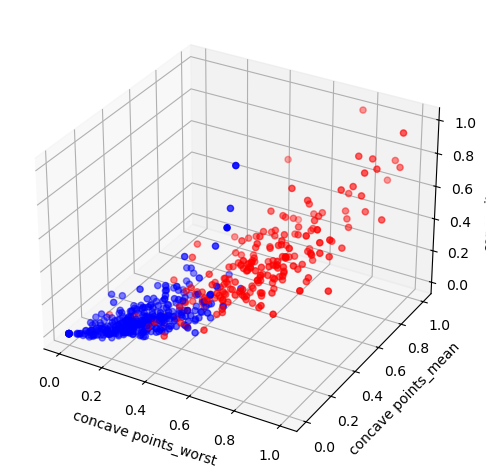

In [61]:
fig,ax= plt.subplots(subplot_kw={"projection":"3d"})

etiquetas = df["diagnosis"].values
colores = ['r' if y=='M' else 'b' for y in etiquetas]

ax.scatter(x_reducidas[:,0],x_reducidas[:,1],x_reducidas[:,2],color=colores)
ax.set_xlabel(cols_seleccionadas[0])
ax.set_ylabel(cols_seleccionadas[1])
ax.set_zlabel(cols_seleccionadas[2])
plt.tight_layout()
plt.show()

In [64]:
Xmean = X.mean(axis=0)
Xstd = X.std(axis=0)
Xnorm = (X-Xmean) / Xstd


k=3
covarianza = Xnorm.T @ Xnorm
U, S, Vt = np.linalg.svd(covarianza)
matriz_proyeccion = Vt[:k]
X_proyection = Xnorm@matriz_proyeccion.T
(X_proyection.shape)


(569, 3)